### Inports and constants

In [11]:
import sys
import os
import pandas as pd
import numpy as np
from pathlib import Path
from scientific_toolbox.interpolation import InterpolationAnalysis, Interpolator
ROOT_DIR = os.path.join(Path().absolute(), '..','..')
DATA_DIR = os.path.join(ROOT_DIR,'data')
OUTPUT_DIR = os.path.join(ROOT_DIR, 'output/Interpolation_Module/Analysis')

data_path = os.path.join(DATA_DIR, 'random_data.csv') # path to the data file, change it to your data file

### Define Analyzer
We provide an InterpolationAnalysis class which implements these methods:

- ```py
  random_data_generator(min, max, num_points, seed=None)
  ```
  This method returns a Pandas dataframe with random generated y values and x values that are equispaced between min and max. Set the seed for reproducible results

- ```py
  data_generator(min, max, num_points, function)
  ```
  This method is similar to the previous one but generates y from x with an input function

- ```py
  sparse_points_generator(self, min, max, n, function=np.sin)
  ```
  This method is used to create points whose x values are equispaced between min and max and whose y values are created with the function inserted

- ```py
  sample_values(values, num_samples)
  ```
  This method is used to sample values from a vector given as input

- ```py
  interpolate_and_plot(self, data, sparse_data=None)
  ```
  This method interpolated the data given as input and plot it. Use sparse_data to interpolate only sampled values within the range of values of data

- ```py
  analyze_accuracy(self, data, sparse_data)
  ```
  This method is used to analyze the accuracy of the interpolations

- ```py
  analyze_efficiency(self, data, sparse_data)
  ```
  This method analyzes the efficiency of the interpolations

- ```py
  plot_order_of_convergence(self, data, sparse_data, n_points_vector, function=np.sin)
  ```
  This method plots the order of convergence for a vector of equispaced points given as input. The function is used to create the points


- ```py
  time_comparison(self, data)
  ```
  This method is used to compare the time taken by our interpolations and the ones of scipy


In [2]:
analyzer = InterpolationAnalysis()

### Interpolating random data
- create random data with apposite function in the module
- use interpolate_and_plot to observe the interpolation

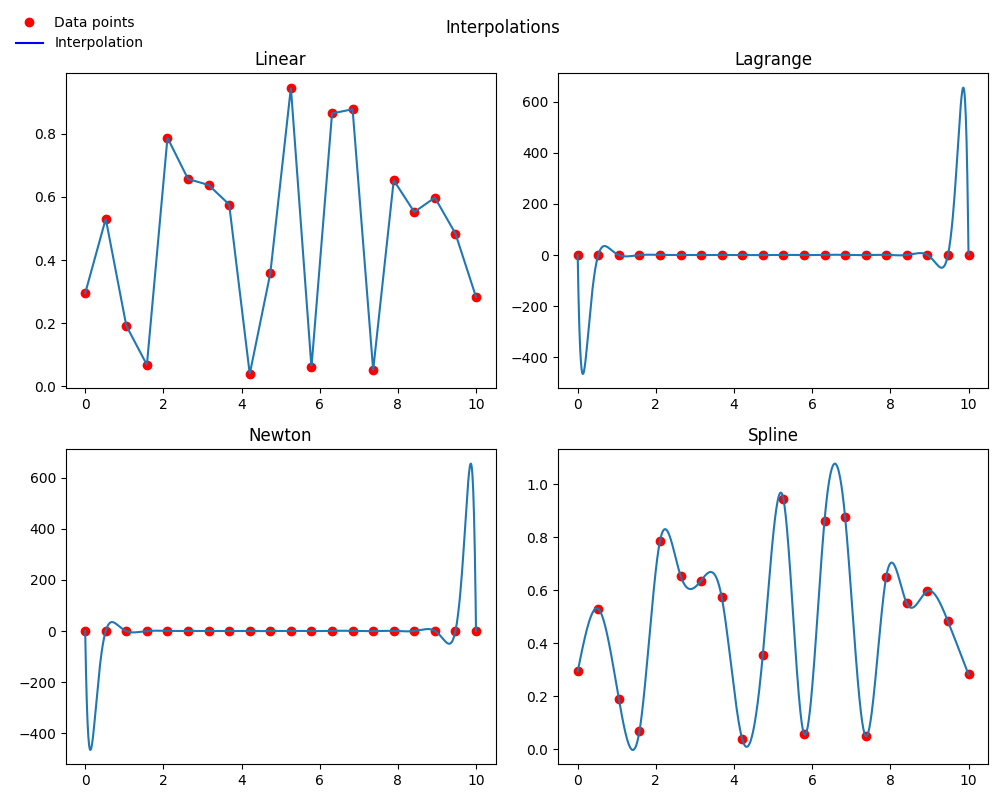

In [3]:
random_data = analyzer.random_data_generator(0, 10, 20, seed=17)
analyzer.interpolate_and_plot(random_data)


### Interpolate sampled points from a function
- create data using data_generator method 
- create sampled values from that data with sample_values method
- use interpolate_and_plot to see the interpolation

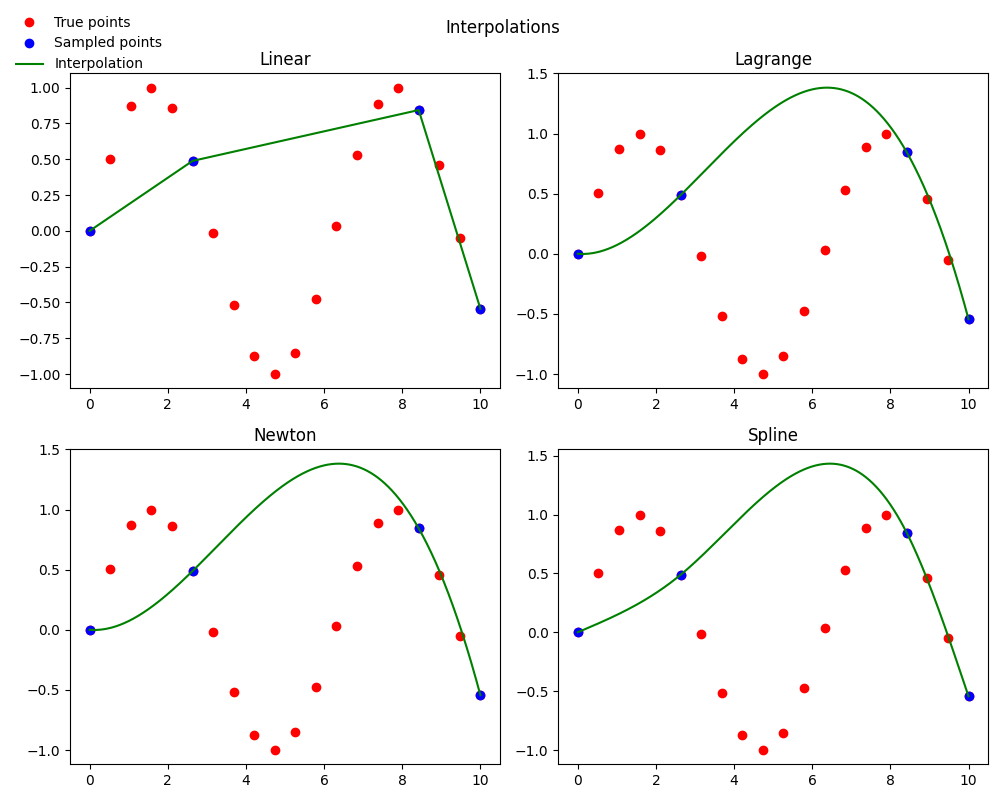

In [4]:
# Using a function to generate data
function_data = analyzer.data_generator(0, 10, 20, np.sin)
function_sparse_data = analyzer.sample_values(function_data['x'], 5)
analyzer.interpolate_and_plot(function_data, function_sparse_data)


### Analyzing accuracy and efficiency

In [5]:
accuracies = analyzer.analyze_accuracy(function_data, function_sparse_data)
efficiencies = analyzer.analyze_efficiency(function_data, function_sparse_data)
for method, mae in accuracies.items():
    print(f"Mean Absolute Error for {method}: {mae}")

Mean Absolute Error for linear: 0.5450183716877584
Mean Absolute Error for lagrange: 0.7688034262187229
Mean Absolute Error for newton: 0.7688034262187229
Mean Absolute Error for cubic_spline: 0.7636172098760758
Linear Interpolation: 2542 ns
Lagrange Interpolation: 2500 ns
Newton Interpolation: 4084 ns
Cubic Spline Interpolation: 1875 ns


### Analyzing oder of convergence
- insert the number of equispaced points 
- use plot_oder_of_convergence method to plot the order of convergence

Linear OOC:  [2.752405446700631, 2.1263165982504137, 2.0958599350781886, 2.0240456515463343]
Lagrange OOC:  [4.532460541424831, 17.02887166817728, 22.99338161867002, -25.88676761705721]
Newton OOC:  [4.532460541424835, 17.028871672713453, 22.92382964572214, -25.088983209651193]
Spline OOC:  [5.7082172240793865, 4.357080781699909, 3.9152507798848832, 5.070128321860395]


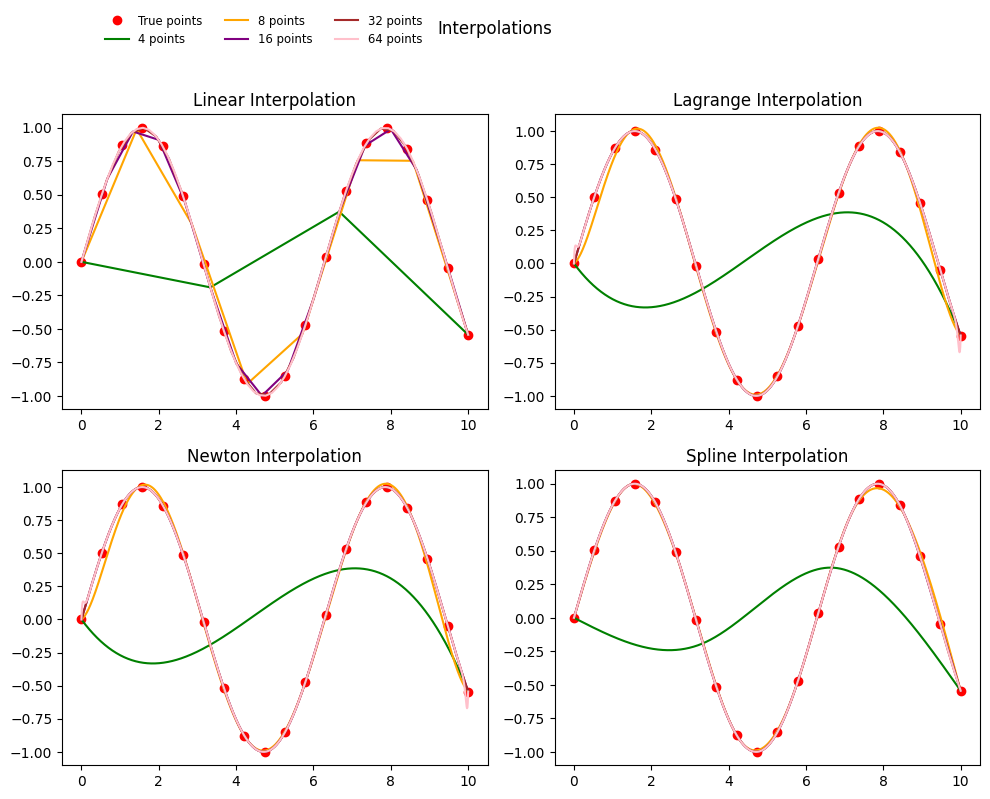

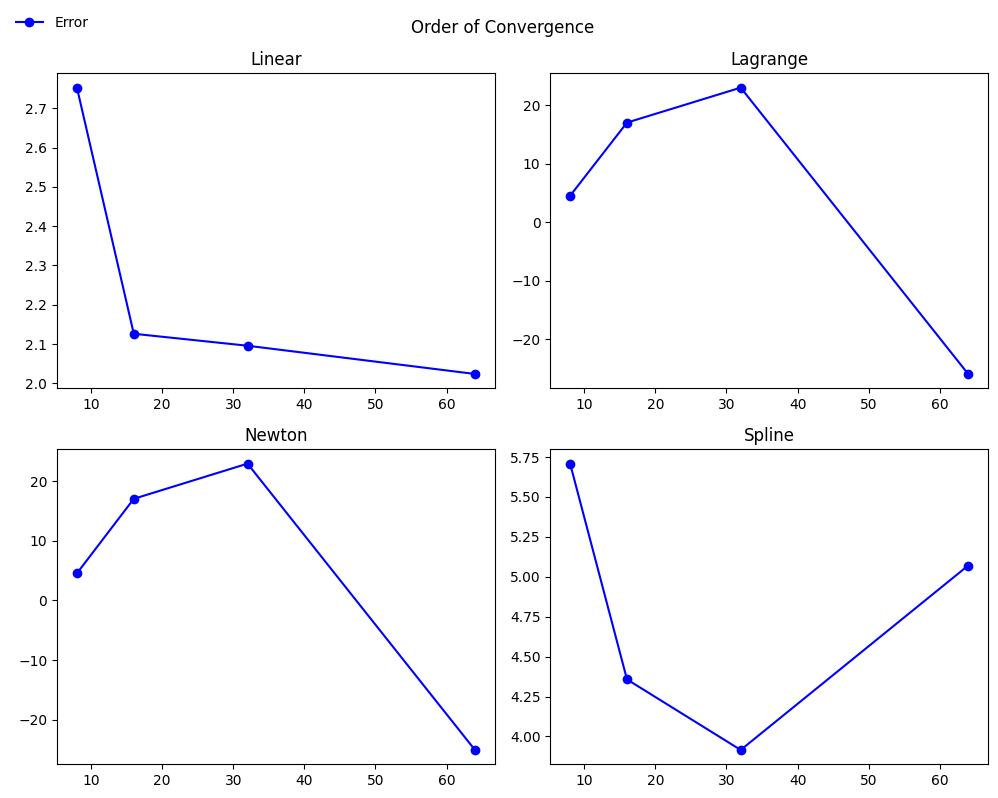

In [6]:
n_points_vector = [4, 8, 16, 32, 64]
analyzer.plot_order_of_convergence(function_data, function_sparse_data, n_points_vector)


### Time comparison against scipy interpolation

In [7]:
# Time comparison
analyzer.time_comparison(random_data)


Linear Interpolation Time: [1.1920928955078125e-05]seconds
Scipy Linear Interpolation Time: [0.00013518333435058594]seconds
Linear Interpolation is faster than Scipy Linear Interpolation.

Lagrange Interpolation Time: [1.2159347534179688e-05]seconds
Scipy Lagrange Interpolation Time: [0.012274742126464844]seconds
Lagrange Interpolation is faster than Scipy Lagrange Interpolation.

Spline Interpolation Time: [1.8835067749023438e-05]seconds
Scipy Spline Interpolation Time: [0.00023603439331054688]seconds
Spline Interpolation is faster than Scipy Spline Interpolation.


In [8]:
interpolator = Interpolator()

The interpolated value at 5.67 is: 0.9155243967054741


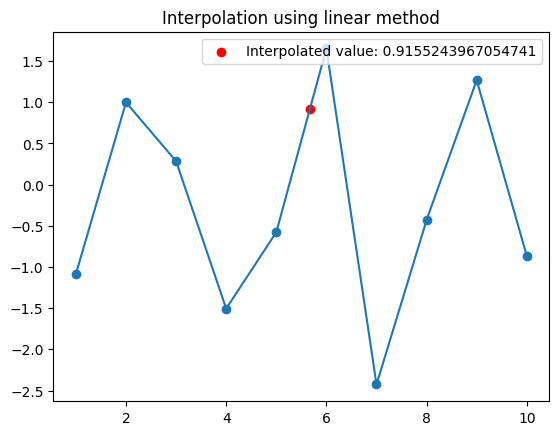

In [14]:
data = pd.read_csv('../../data/random_data.csv')
interpolator.get_data(data)
interpolator.set_interpolation_method('linear')
interpolator.set_value_to_interpolate(5.67)
interpolator.interpolate()
interpolator.plot()